# R or Python

## 有冇问题?!

两者都是很好的语言,对比也有很多

- 来自: [Choosing R or Python for data analysis? An infographic](http://blog.datacamp.com/r-or-python-for-data-analysis/)
- 给出了完备的对比

简单的说,都是好的有用的语言,只是...



## 程序猿
为目标时...

更加经常面对的不是海量规范数据的分析,而是海量混乱数据的整理

比如:

### 案例:个人时间帐单
![把时间当朋友](http://s5.zoomquiet.io/140303-time4km/i/s3778613-friendtime.jpg?imageView2/2/w/150)

推荐的:

![奇怪的一生](http://s5.zoomquiet.io/140303-time4km/i/s1093496-stronglife.jpg?imageView2/2/w/150)



#### 我的实践

![手工记帐](http://s5.zoomquiet.io/140303-time4km/i/snap/zq-tilog.jpg?imageView2/2/w/150) ![每日任务图谱](http://s5.zoomquiet.io/140303-time4km/i/snap/zq-talog.jpg?imageView2/2/w/150)

当年的可视化分析: 

![ChartDirector](http://s5.zoomquiet.io/140303-time4km/i/snap/zq-ti-month-pie-0902.png?imageView2/2/w/150)

300+行!



##### 移动化

- MrTimer
- aTimeLogger2
![atl2](http://s5.zoomquiet.io/140303-time4km/i/snap/zTM-atimelogger-1.jpg?imageView2/2/w/150) 
![atl2](http://s5.zoomquiet.io/140303-time4km/i/snap/zTM-atimelogger-0.jpg?imageView2/2/w/150)


## 问题在原始数据的 chaos


手工时间帐单:

    date,tI,tO,tC,tM,tF,tS                  Pt,Pd,Pl,Po
    110701,0.00,11.5,0.00,2.50,4.00,7.50
    110704,3.00,0.00,1.75,4.75,6.75,8.00
    ...
    110726,1.50,4.25,0.00,1.00,9.75,7.50    8, 6, 1, 4
    110727,4.50,2.50,0.00,4.00,5.00,7.50    8, 5, 2, 8

date 含义

    ,tI     输入
    ,tO     输出
    ,tC     交流
    ,tM     杂务
    ,tF     家庭
    ,tS     睡眠             

    Pt      蕃茄钟
    ,Pd     DONE 蕃茄钟
    ,Pl     LOST 任务钟
    ,Po     OUT  蕃茄钟

不同版本的 aTL2 数据:
    
    # android 版本
    活动类别,持续时间,开始时间,结束时间,备注
    Chaos,3.7,04/01 20:54,04/02 00:35,
    ...
    活动类别,持续时间,Percent
    Life,364.5,47.5
    Output,182.5,23.8
    Chaos,127.0,16.5
    Livin,70.3,9.2
    Input,23.5,3.1
    其他,0.1,0.0
    总计,768.0

    # iOS 6.*
    "活动类别","持续时间","开始时间","结束时间","备注"
    "Chaos","05:30","2014-10-01 18:56","2014-10-02 00:26",
    "用餐","01:15","2014-10-01 17:40","2014-10-01 18:56",
    ...
    "活动类别","持续时间","%"
    "睡眠","220:19","29.61"
    "Chaos","144:28","19.42"
    ...

    # iOS 7+
    活动类别,持续时间,开始时间,结束时间,备注
    GDG,1.20,2015-04-01 23:10,2015-04-02 00:22,
    GDG,1.52,2015-04-01 21:39,2015-04-01 23:10,
    ...
    活动类别,持续时间,Percent
    Livin,230.98,30.1
    Livin/睡眠,214.17,27.9
    Livin/电影,12.05,1.6
    Livin/娱乐,0.93,0.1
    ...
    Output/Pt0+Life/交通,0.02,0.0
    Life/用餐+Output/交流,0.02,0.0
    其他,0.07,0.0
    总计,768.00


所以,要进行一系列数据整理先,这就是 R 难以折腾的了...

# iPy notebook + Jupyter

嗯啍,当然,要我更多的小伙伴,最最常见的:

- Pandas
- numpy
- matpotlib
- ...



In [1]:
print "是也乎"

是也乎


In [2]:
%install_ext https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py

Installed gvmagic.py. To use it, type:
  %load_ext gvmagic


In [4]:
%load_ext gvmagic

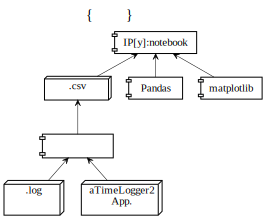

In [21]:
%%dot digraph G4data2chat {
        graph [label="时间帐单历史数据分析{流程图}"
        ,fontsize=14.0
        ,labeljust="l",labelloc="t",center=1
        ,ranksep=0.3,center=1,ratio=compress
        ,rankdir=BT
        ];

    node[fontsize=11.0,height=0.3
        ,shape=component 
        ];

    edge [fontsize=9.0,fontcolor="#333333"
        ,arrowsize=0.6,arrowhead=vee,arrowtail=none
        ,style="setlinewidth(0.5)"
        ];

    D4LOG [label=".log\n手工记录",shape=box3d];
    D4ATL [label="aTimeLogger2\nApp.记录",shape=box3d];
    LOAER [label="数据导入器"];
    D2CSV [label=".csv数据表",shape=box3d];
    IPYNB [label="IP[y]:notebook"];
    PANDAS [label="Pandas"];
    MATPLO [label="matplotlib"];
    
    {D4LOG D4ATL}->LOAER;
        LOAER->D2CSV [label="处理各种意外数据"];
        D2CSV->IPYNB;
    {PANDAS MATPLO}->IPYNB;
}

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [67]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
ls csv/aTLer_14*

csv/aTLer_140101-140201_report.csv  csv/aTLer_140701-140801_report.csv
csv/aTLer_140201-140301_report.csv  csv/aTLer_140801-140901_report.csv
csv/aTLer_140301-140401_report.csv  csv/aTLer_140901-141001_report.csv
csv/aTLer_140401-140501_report.csv  csv/aTLer_141001-141101_report.csv
csv/aTLer_140501-140601_report.csv  csv/aTLer_141101-141201_report.csv
csv/aTLer_140601-140701_report.csv  csv/aTLer_141201-150101_report.csv


In [94]:
ls log/zq-tilog-10*

log/zq-tilog-1009.txt  log/zq-tilog-1010.txt  log/zq-tilog-1011.txt  log/zq-tilog-1012.txt


In [97]:
ls data/atl2_13*

data/atl2_130201-130301.csv  data/atl2_130701-130801.csv  data/atl2_131101-131201.csv
data/atl2_130401-130501.csv  data/atl2_130801-130901.csv  data/atl2_131201-130101.csv
data/atl2_130501-130601.csv  data/atl2_130901-131001.csv  data/atl2_131201-140101.csv
data/atl2_130601-130701.csv  data/atl2_131001-131101.csv


In [186]:
df = pd.read_csv('data/atl2_130201-130301.csv')
#df[:-1]
#df.plot(kind='area')

In [188]:
df['活动类别']
'''
_labels = []
for k in list(df[:-1]['活动类别']):
    print k
    if "其他" == k:
        _labels.append('Others')
    elif "总计"==k:
        _labels.append('Totle')
    else:
        _labels.append(k)
print _labels
'''

'\n_labels = []\nfor k in list(df[:-1][\'\xe6\xb4\xbb\xe5\x8a\xa8\xe7\xb1\xbb\xe5\x88\xab\']):\n    print k\n    if "\xe5\x85\xb6\xe4\xbb\x96" == k:\n        _labels.append(\'Others\')\n    elif "\xe6\x80\xbb\xe8\xae\xa1"==k:\n        _labels.append(\'Totle\')\n    else:\n        _labels.append(k)\nprint _labels\n'

In [189]:
df[:-1]['Percent']

0    47.5
1    23.8
2    16.5
3     9.2
4     3.1
5     0.0
Name: Percent, dtype: float64

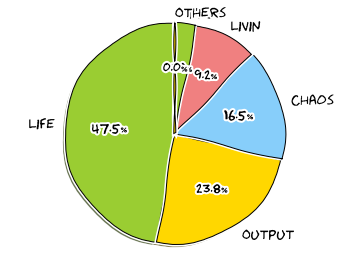

In [191]:
labels = _labels#list(df['活动类别'])
sizes = list(df[:-1]['持续时间'])
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [13]:
df = pd.read_csv('data/pom_1108.txt')
#df.index(df['date'])
df.columns
#df.describe()
#df.plot(kind='area', stacked=False)

Index([u'date', u'Pt', u'Pd', u'Pl', u'Po'], dtype='object')

In [16]:
df.plot(kind='area', stacked=False)

## 透视表
~ pivot_table

In [158]:
df = pd.read_csv('data/_all_atlogger2.csv')
df.head()
#df.columns



,date,Life,Output,Chaos,Livin,Input,Others,Total,Untracked
0,1302,364.5,182.5,127.0,70.3,23.5,0.1,768,0
1,1304,329.8,159.4,164.9,38.7,48.6,2.6,744,0
2,1305,368.3,173.5,164.1,19.4,28.8,1.6,768,0
3,1306,332.0,167.7,146.4,21.0,76.1,0.1,744,0
4,1307,368.8,180.8,162.9,27.0,28.1,0.4,768,0


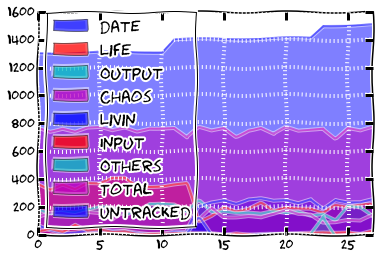

In [159]:
df.plot(kind='area', stacked=False)

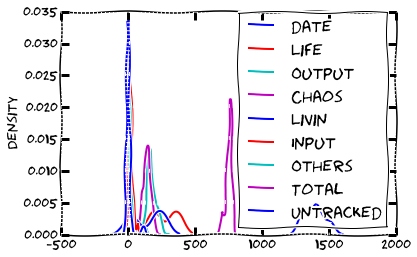

In [160]:
df.plot(kind='kde', stacked=False)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
ls data/pom_*

data/pom_1107.txt  data/pom_1112.txt  data/pom_1205.txt  data/pom_1210.txt  data/pom_1303.txt
data/pom_1108.txt  data/pom_1201.txt  data/pom_1206.txt  data/pom_1211.txt
data/pom_1109.txt  data/pom_1202.txt  data/pom_1207.txt  data/pom_1212.txt
data/pom_1110.txt  data/pom_1203.txt  data/pom_1208.txt  data/pom_1301.txt
data/pom_1111.txt  data/pom_1204.txt  data/pom_1209.txt  data/pom_1302.txt


In [18]:
df = pd.read_csv('data/pom_1302.txt')
df.head()

,date,Pt,Pd,Pl,Po
0,2013-02-01,6,1,1,4
1,2013-02-02,0,0,0,0
2,2013-02-04,6,1,1,4
3,2013-02-18,6,1,1,1
4,2013-02-19,6,1,1,7


# 参考:

- [Rendering IPython notebooks on GitHub](http://blog.jupyter.org/2015/05/07/rendering-notebooks-on-github/)
    - [Jupyter and the future of IPython — IPython](http://ipython.org/?action=AttachFile&do=get&target=ipython_scipy10_india.pdf)
    - **[jupyter/tmpnb](https://github.com/jupyter/tmpnb)**    
- 工作流: [Publishing Workflows 
for Jupyter](http://odewahn.github.io/publishing-workflows-for-jupyter)
- 可视化: [Survival Analysis with Plotly: R vs Python | IPython Notebooks | plotly](https://plot.ly/ipython-notebooks/survival-analysis-r-vs-python/)


